C:\Users\Kaito\AppData\Local\Temp\ipykernel_13884\2491601256.py:57: RuntimeWarning: invalid value encountered in arccos
  180 / np.pi * np.arccos(no / n1 * cos_x),
C:\Users\Kaito\AppData\Local\Temp\ipykernel_13884\2491601256.py:60: RuntimeWarning: invalid value encountered in arccos
  180 / np.pi * np.arccos(n1 / n2 * np.cos(th1 * np.pi / 180)),
C:\Users\Kaito\AppData\Local\Temp\ipykernel_13884\2491601256.py:71: RuntimeWarning: invalid value encountered in true_divide
  r12 = np.where((kz2 == 0) & (kz1 == 0), 1, (kz1 - kz2) / (kz1 + kz2) * np.exp(-2 * kz2**2 * rough12**2))


フィットしたパラメータ: [ 0.37868751 90.51235377  2.9886037   4.9567544 ]
共分散行列:
 [[ 3.76516996e-06  1.89101999e-05  7.30054347e-05 -8.77246357e-05]
 [ 1.89101999e-05  5.13864605e-03  3.26892308e-04 -5.95597797e-04]
 [ 7.30054347e-05  3.26892308e-04  4.75379235e-03 -4.58381561e-04]
 [-8.77246357e-05 -5.95597797e-04 -4.58381561e-04  8.42191496e-03]]


C:\Users\Kaito\AppData\Local\Temp\ipykernel_13884\2491601256.py:57: RuntimeWarning: invalid value encountered in arccos
  180 / np.pi * np.arccos(no / n1 * cos_x),
C:\Users\Kaito\AppData\Local\Temp\ipykernel_13884\2491601256.py:60: RuntimeWarning: invalid value encountered in arccos
  180 / np.pi * np.arccos(n1 / n2 * np.cos(th1 * np.pi / 180)),
C:\Users\Kaito\AppData\Local\Temp\ipykernel_13884\2491601256.py:71: RuntimeWarning: invalid value encountered in true_divide
  r12 = np.where((kz2 == 0) & (kz1 == 0), 1, (kz1 - kz2) / (kz1 + kz2) * np.exp(-2 * kz2**2 * rough12**2))


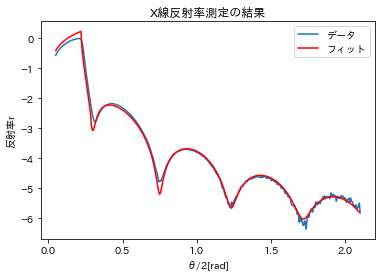

In [36]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import curve_fit
import japanize_matplotlib

with open(r'\Users\Kaito\OneDrive\ドキュメント\デスクトップ\1_2-Theta_Omega.TXT', 'r') as file:
    
    data = file.read()  
    #print(data)
rows = data.split("' '")

columns = [row.split("\t") for row in rows]

# ’\n’をsplitで区切る
columns = data.split("\n")

SL = []
for i, row in enumerate(columns):
    
    if i < 23:
        continue
    #print(i,row)
    # print(len(row))
    # print(row.split()[0])
    # print(len(float(row.split()[0])))
    try:
        SL.append([float(row.split()[0]), float(row.split()[1])])
    except:
        #print('pass')  # 警告文(逃してますよ)
        pass
# リスト型からNDarrayへ変更
SL = np.array(SL)


x = SL[:,0] # スライス(入射角)
x = x/2 
y = SL[:,1]  #強度
y1 = np.max(y)  
y2 = y/y1
y3 = np.log10(y2)

def XRR(x, den1, t1, rough01, rough12):
    er = 0.0000282
    ram = 1.54178
    den0 = 0
    den2 = 0.7
    scale = 1.5
    afure = 0.28648

    no = 1 - ram**2 * den0 * er / (2 * np.pi)
    n1 = 1 - ram**2 * den1 * er / (2 * np.pi)
    n2 = 1 - ram**2 * den2 * er / (2 * np.pi)

    cos_x = np.cos(x * np.pi / 180)
    th1 = np.where(no / n1 * cos_x <= 1,
                   180 / np.pi * np.arccos(no / n1 * cos_x),
                   0)
    th2 = np.where(n1 / n2 * np.cos(th1 * np.pi / 180) <= 1,
                   180 / np.pi * np.arccos(n1 / n2 * np.cos(th1 * np.pi / 180)),
                   0)

    sin_x = np.sin(x * np.pi / 180)
    kz0 = 2 * np.pi / ram * no * sin_x
    kz1 = 2 * np.pi / ram * n1 * np.sin(th1 * np.pi / 180)
    kz2 = 2 * np.pi / ram * n2 * np.sin(th2 * np.pi / 180)

    fail = kz1 * t1

    r01 = np.where((kz0 == 0) & (kz1 == 0), 1, (kz0 - kz1) / (kz0 + kz1) * np.exp(-2 * kz1**2 * rough01**2))
    r12 = np.where((kz2 == 0) & (kz1 == 0), 1, (kz1 - kz2) / (kz1 + kz2) * np.exp(-2 * kz2**2 * rough12**2))

    A = scale * ((r01 + r12 * np.cos(2 * fail))**2 + (r12 * np.sin(2 * fail))**2) / ((1 + r01 * r12 * np.cos(2 * fail))**2 + (r01 * r12 * np.sin(2 * fail))**2)

    y = np.where(x < afure, np.log10(np.maximum(scale * sin_x / np.sin(afure * np.pi / 180) * A, 1e-10)),
                 np.log10(np.maximum(A, 1e-10)))
    return y

# 初期パラメータ
initial_params = [0.36710955, 88.46879038, 2.97675954, 4.91557159]

# パラメータの境界
lower_bounds = [0.01, 1, 0, 1.5]
upper_bounds = [2, 100, 10, 10]

# カーブフィッティングを実行
try:
    params, covariance = curve_fit(XRR, x, y3, p0=initial_params, bounds=(lower_bounds, upper_bounds), method='trf')
    den1, t1, rough01, rough12 = params

    print("フィットしたパラメータ:", params)
    print("共分散行列:\n", covariance)

    # 結果をプロット
    plt.plot(x, y3, label='データ')
    plt.plot(x, XRR(x, *params), color='red', label='フィット')
    plt.xlabel('θ/2[rad]')
    plt.ylabel('反射率r')
    plt.title('X線反射率測定の結果')
    plt.legend()
    plt.show()

except RuntimeError as e:
    print("フィッティングに失敗しました:", e)